In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

## Import & display data 

In [68]:
df = pd.read_csv("walmart-sales-dataset-of-45stores.csv")
# Display data
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [69]:
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [70]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


# visualize quantitative variables distributions 

>## Weekly Sales

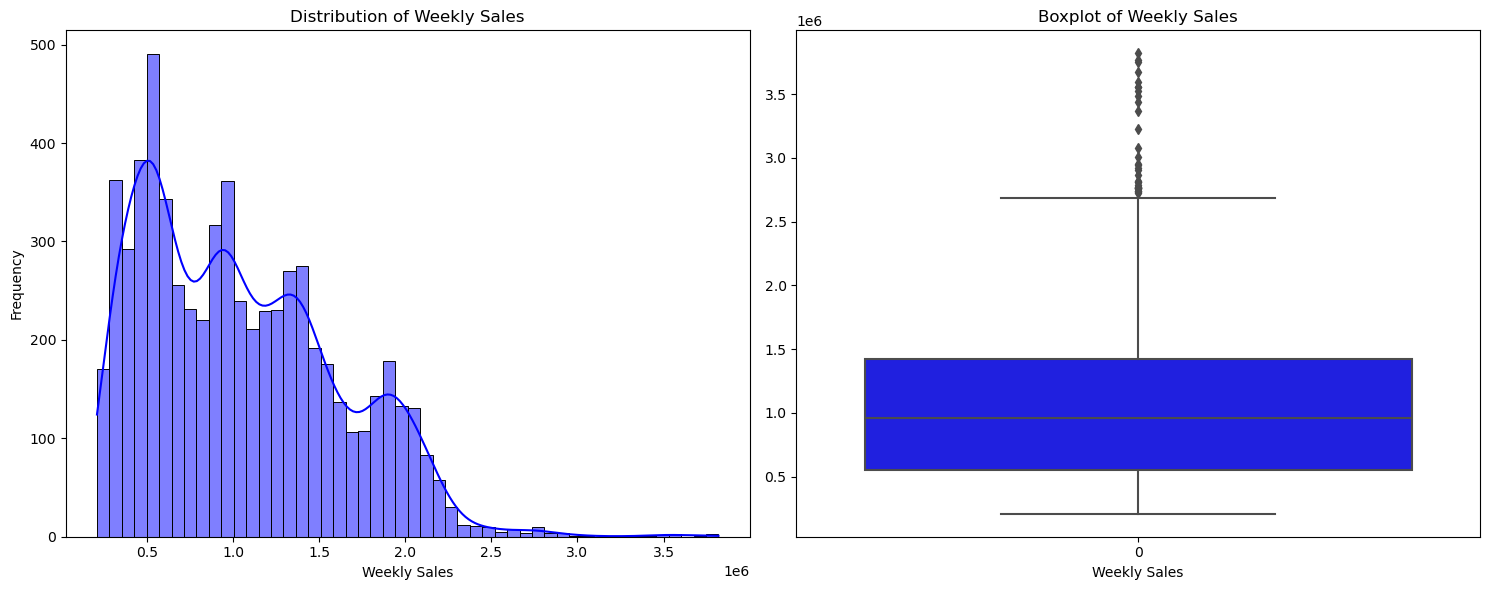

In [71]:
plt.figure(figsize=(15, 6))

# Weekly Sales distribution - Histogram
plt.subplot(1, 2, 1)  
sns.histplot(df['Weekly_Sales'], kde=True, bins=50, color='b')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')

# Weekly Sales distribution - Boxplot
plt.subplot(1, 2, 2) 
sns.boxplot(df['Weekly_Sales'], color='b')
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')

plt.tight_layout() 
plt.show()


>## Holidays
>(If the week has a special Holiday or not. 1-The week has a Holiday 0-Fully working week Holiday events is given in)

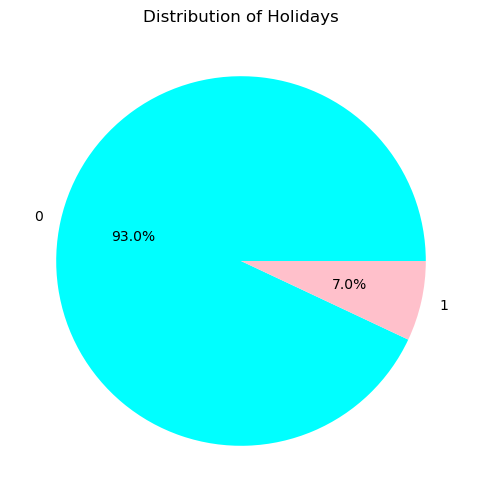

In [72]:
# Pie chart
plt.figure(figsize=(8, 6))
holiday_counts = df['Holiday_Flag'].value_counts()
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', colors=['cyan', 'pink'])
plt.title('Distribution of Holidays')
plt.show()

>## Temperature (Average Temperature of the week of sales)

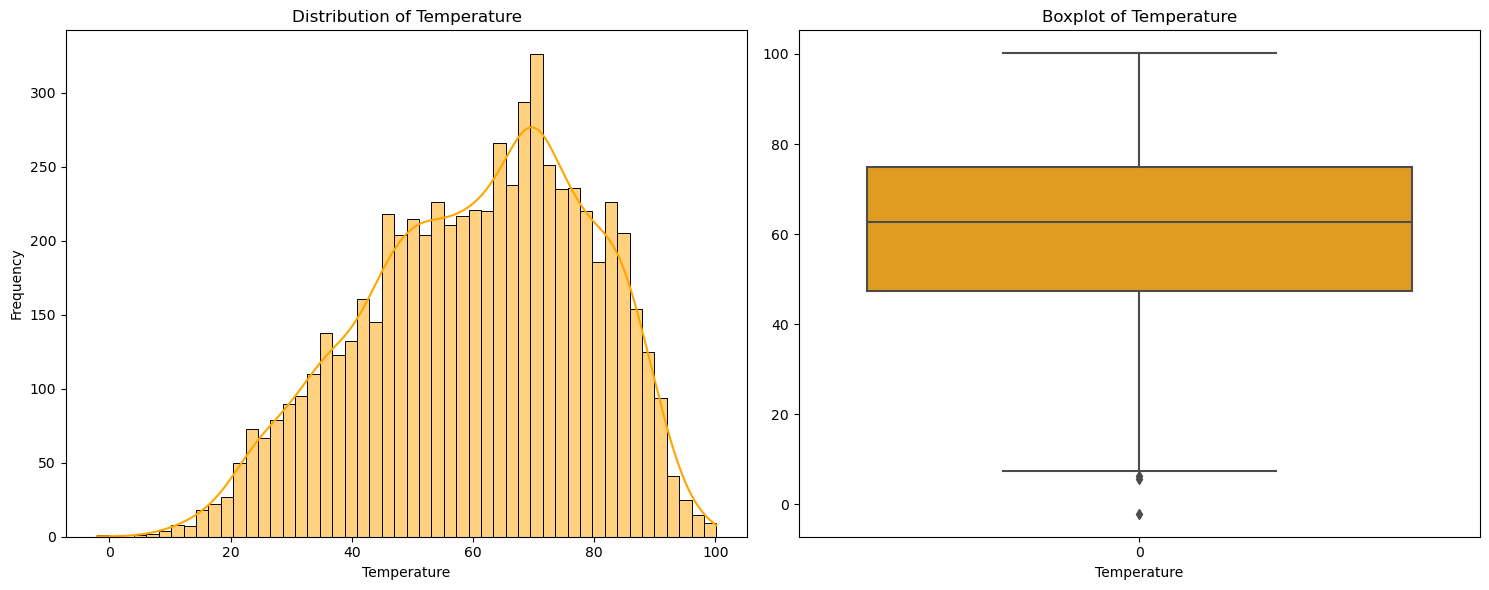

In [73]:
plt.figure(figsize=(15, 6))

# Temperature distribution - Histogram
plt.subplot(1, 2, 1)  
sns.histplot(df['Temperature'], kde=True, bins=50, color='orange')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Temperature distribution - Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(df['Temperature'], color='orange')
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')

plt.tight_layout() 
plt.show()

>##  Fuel price (Price of the Fuel in the region of the given store)

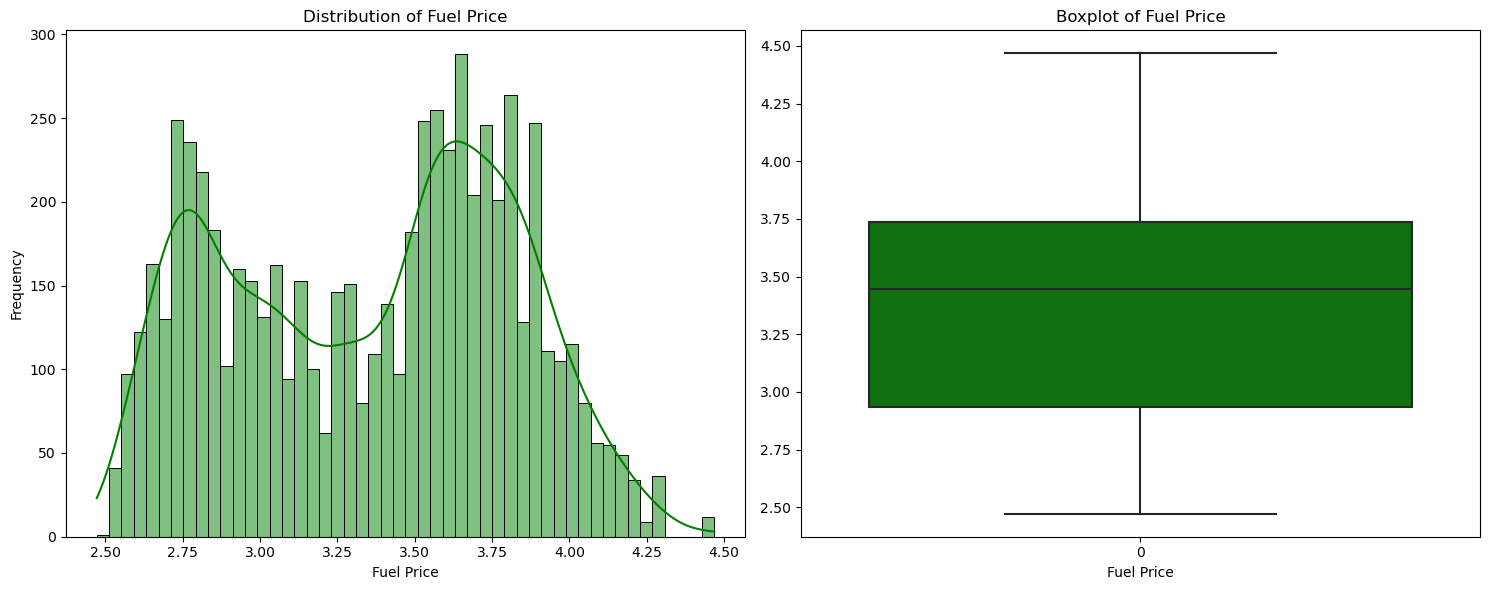

In [74]:
plt.figure(figsize=(15, 6))

# Fuel Price distribution - Histogram
plt.subplot(1, 2, 1) 
sns.histplot(df['Fuel_Price'], kde=True, bins=50, color='green')
plt.title('Distribution of Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')

# Fuel Price distribution - Boxplot
plt.subplot(1, 2, 2) 
sns.boxplot(df['Fuel_Price'], color='green')
plt.title('Boxplot of Fuel Price')
plt.xlabel('Fuel Price')

plt.tight_layout() 
plt.show()

>## Customer Price Index

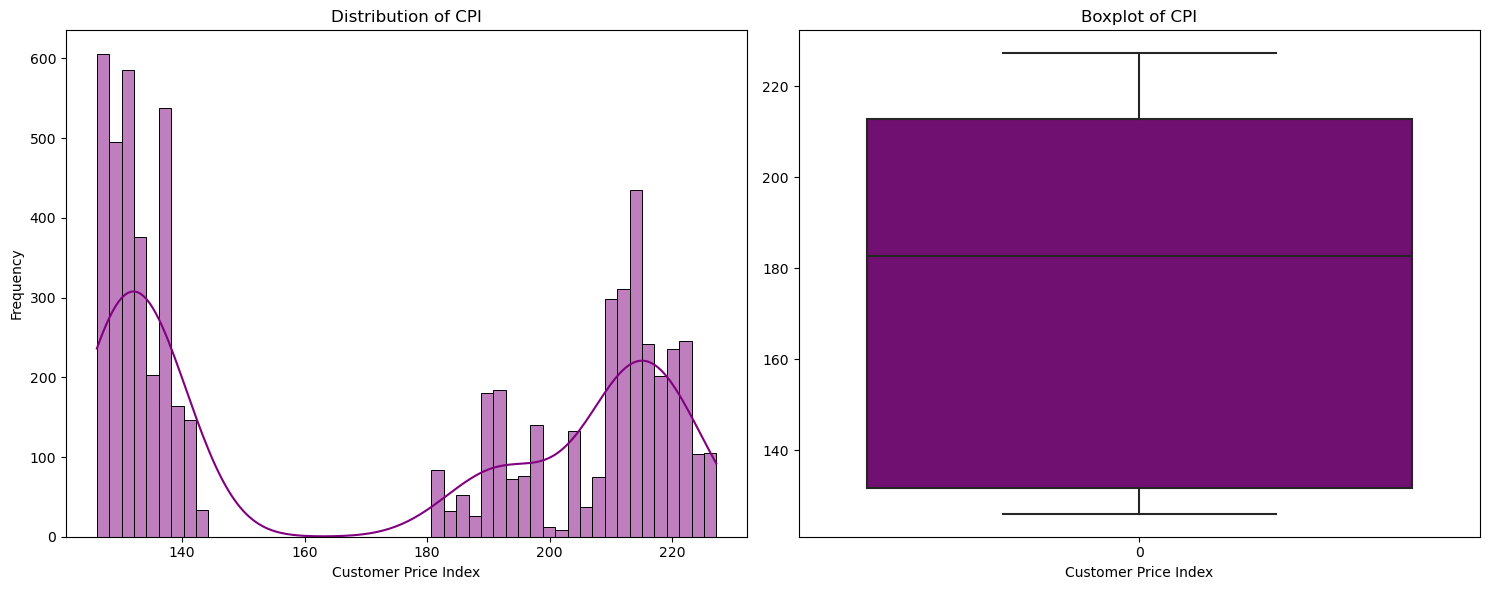

In [75]:
plt.figure(figsize=(15, 6))

# CPI distribution - Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['CPI'], kde=True, bins=50, color='purple')
plt.title('Distribution of CPI')
plt.xlabel('Customer Price Index')
plt.ylabel('Frequency')

# CPI distribution - Boxplot
plt.subplot(1, 2, 2) 
sns.boxplot(df['CPI'], color='purple')
plt.title('Boxplot of CPI')
plt.xlabel('Customer Price Index')

plt.tight_layout() 
plt.show()

>## Unemployment of the given store region

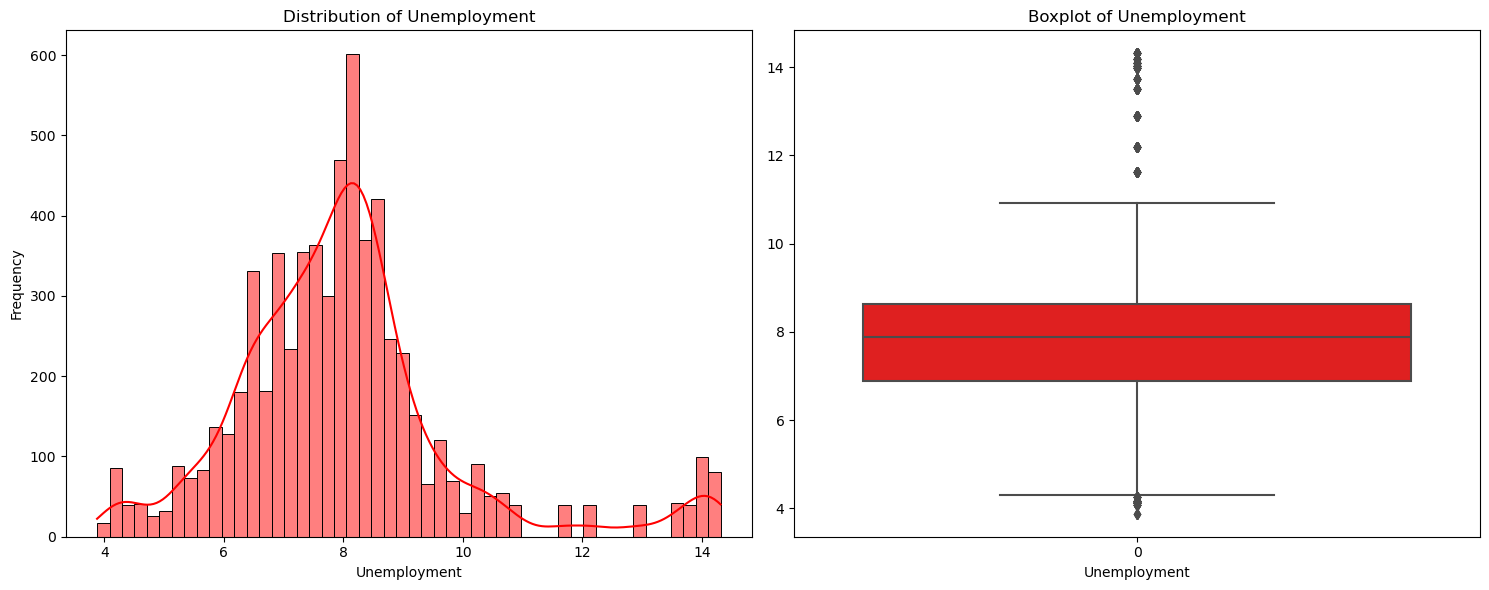

In [76]:
plt.figure(figsize=(15, 6))

# Unemployment distribution - Histogram
plt.subplot(1, 2, 1) 
sns.histplot(df['Unemployment'], kde=True, bins=50, color='r')
plt.title('Distribution of Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Frequency')

# Unemployment distribution - Boxplot
plt.subplot(1, 2, 2) 
sns.boxplot(df['Unemployment'], color='r')
plt.title('Boxplot of Unemployment')
plt.xlabel('Unemployment')

plt.tight_layout() 
plt.show()

# perform data cleaning

In [77]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [78]:
df.duplicated().sum()

0

# Exploratory Data Analysis


># a) Which store has maximum sales?

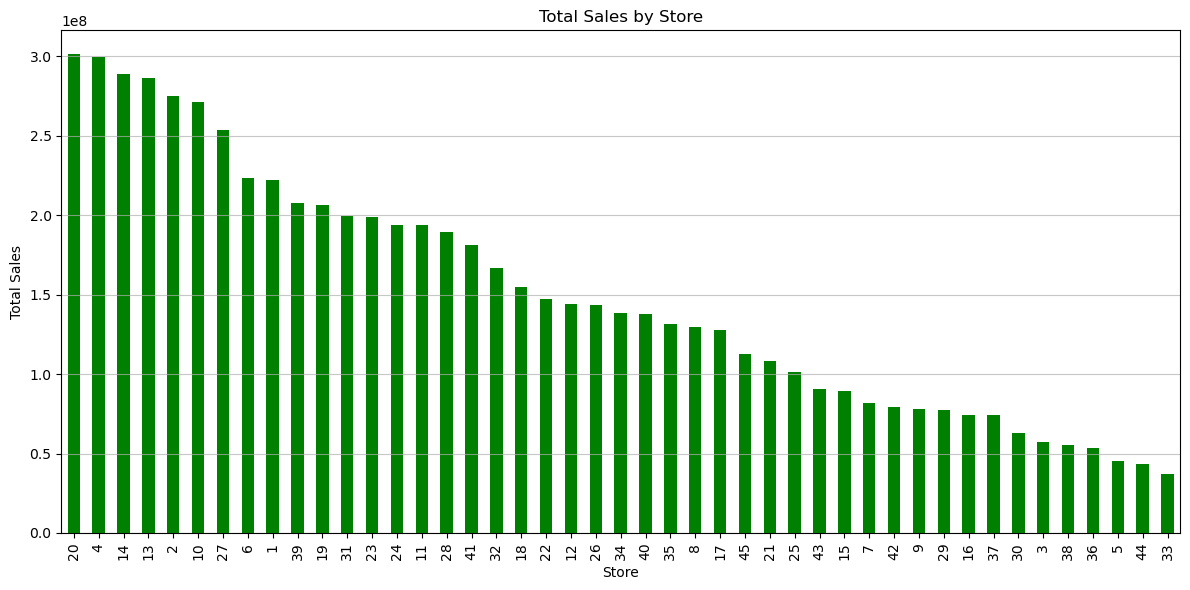

In [79]:
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum()
# Sort stores by sales in descending order
sales_by_store_sorted = sales_by_store.sort_values(ascending=False)

# bar plot
plt.figure(figsize=(12, 6))
sales_by_store_sorted.plot(kind='bar', color='green')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [80]:
# Find the store with maximum sales
max_sales_store = sales_by_store.idxmax()
max_sales = sales_by_store[max_sales_store]

print("Store with maximum sales:", max_sales_store)
print("Maximum sales: $", max_sales)

Store with maximum sales: 20
Maximum sales: $ 301397792.46


store 20 has maximum sales

># b)Which store has maximum standard deviation i.e., the sales vary a lot

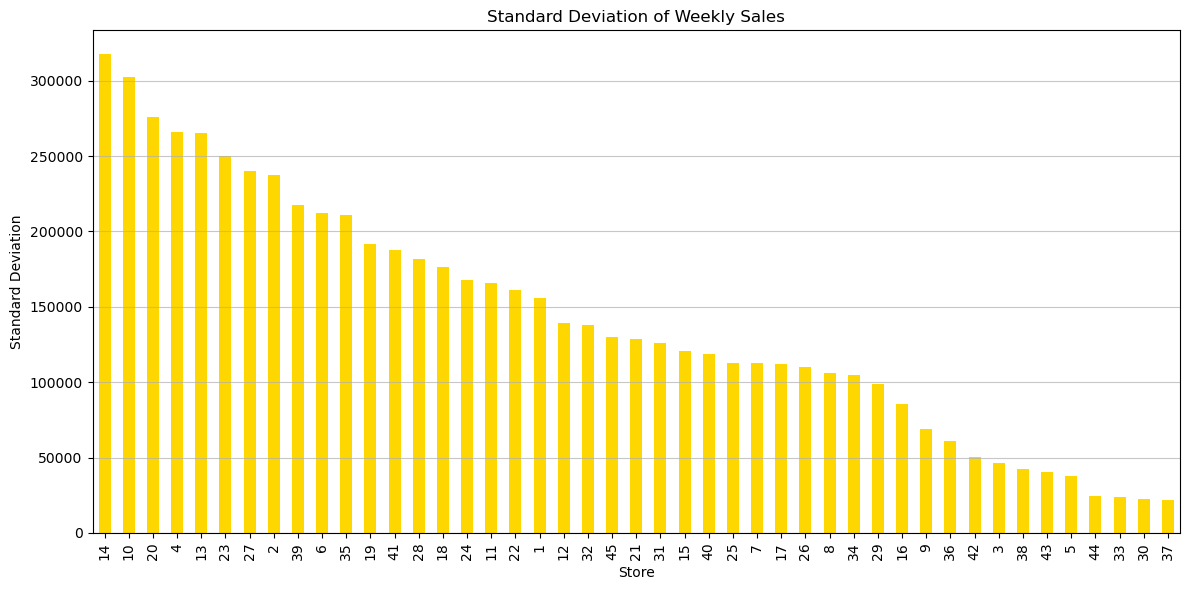

In [81]:
# Calculate standard deviation of sales for each store
sales_std_by_store = df.groupby('Store')['Weekly_Sales'].std()
sales_std_by_store_sorted = sales_std_by_store.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_std_by_store_sorted.plot(kind='bar', color='gold')
plt.title('Standard Deviation of Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Standard Deviation')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [82]:
max_std_store = sales_std_by_store_sorted.idxmax()
print("Store with maximum standard deviation of sales:", max_std_store)

Store with maximum standard deviation of sales: 14


store 14 has maximum standard deviation i.e., the sales vary a lot

># c)Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together

In [83]:
print(df['Date'].head())

0    05-02-2010
1    12-02-2010
2    19-02-2010
3    26-02-2010
4    05-03-2010
Name: Date, dtype: object


In [84]:
def assign_holiday(date):
    if date in ['12-02-2010', '11-02-2011', '10-02-2012']:
        return 'Super Bowl'
    elif date in ['10-09-2010', '09-09-2011', '07-09-2012']:
        return 'Labour Day'
    elif date in ['26-11-2010', '25-11-2011', '23-11-2012']:
        return 'Thanksgiving'
    elif date in ['31-12-2010', '30-12-2011', '28-12-2012']:
        return 'Christmas'
    else:
        return 'Non-Holiday' 

In [85]:
df['Holiday'] = df['Date'].apply(assign_holiday)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Non-Holiday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Non-Holiday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Non-Holiday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Non-Holiday
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Non-Holiday
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Non-Holiday
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Non-Holiday
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Non-Holiday


In [86]:
mean_sales_non_holiday = df[df.Holiday_Flag == 0]['Weekly_Sales'].mean()
mean_sales_non_holiday

1041256.3802088555

In [87]:
Super_Bowl_sales = df.loc[df['Holiday'] == 'Super Bowl']['Weekly_Sales'].mean()
Labour_Day_sales = df.loc[df['Holiday'] == 'Labour Day']['Weekly_Sales'].mean()
Thanksgiving_sales = df.loc[df['Holiday'] == 'Thanksgiving']['Weekly_Sales'].mean()
Christmas_sales = df.loc[df['Holiday'] == 'Christmas']['Weekly_Sales'].mean()

# Print the results
print("Average Weekly Sales for Each Holiday:")
print("Super Bowl:", Super_Bowl_sales)
print("Labour Day:", Labour_Day_sales)
print("Thanksgiving:", Thanksgiving_sales)
print("Christmas:", Christmas_sales)

Average Weekly Sales for Each Holiday:
Super Bowl: 1079127.9877037038
Labour Day: 1042427.293925926
Thanksgiving: 1471273.427777778
Christmas: 960833.1115555555


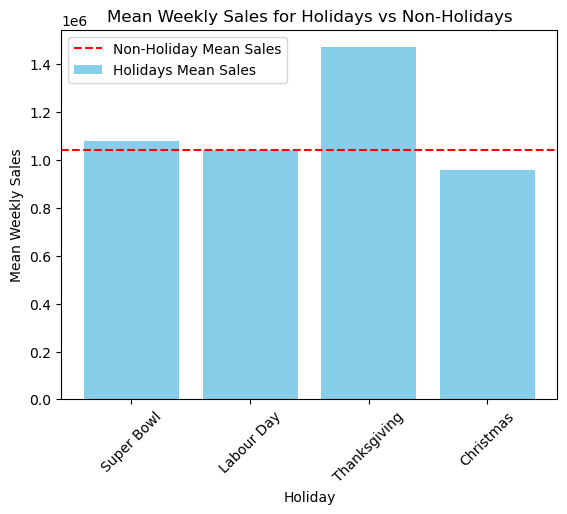

In [88]:
# Define holiday names and their respective mean sales
holiday_names = ['Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas']
holiday_means = [Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales]

# Calculate mean sales for non-holiday weeks
mean_sales_non_holiday = df.loc[df['Holiday'] == 'Non-Holiday']['Weekly_Sales'].mean()

plt.bar(holiday_names, holiday_means, color='skyblue', label='Holidays Mean Sales')
plt.axhline(y=mean_sales_non_holiday, color='red', linestyle='--', label='Non-Holiday Mean Sales')
plt.xlabel('Holiday')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales for Holidays vs Non-Holidays')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Christmas has negative impact on Sales while 
Labour Day Week, Super Bowl Week and Thanksgiving Week have positive impact on Sales(which means they have higher sales than the Mean of Non-Holiday Week sales) 

># d)Provide a monthly and semester view of sales in units and give insights.

In [89]:
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Non-Holiday,2,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl,2,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Non-Holiday,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Non-Holiday,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Non-Holiday,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Non-Holiday,28,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Non-Holiday,10,5,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Non-Holiday,10,12,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Non-Holiday,19,10,2012


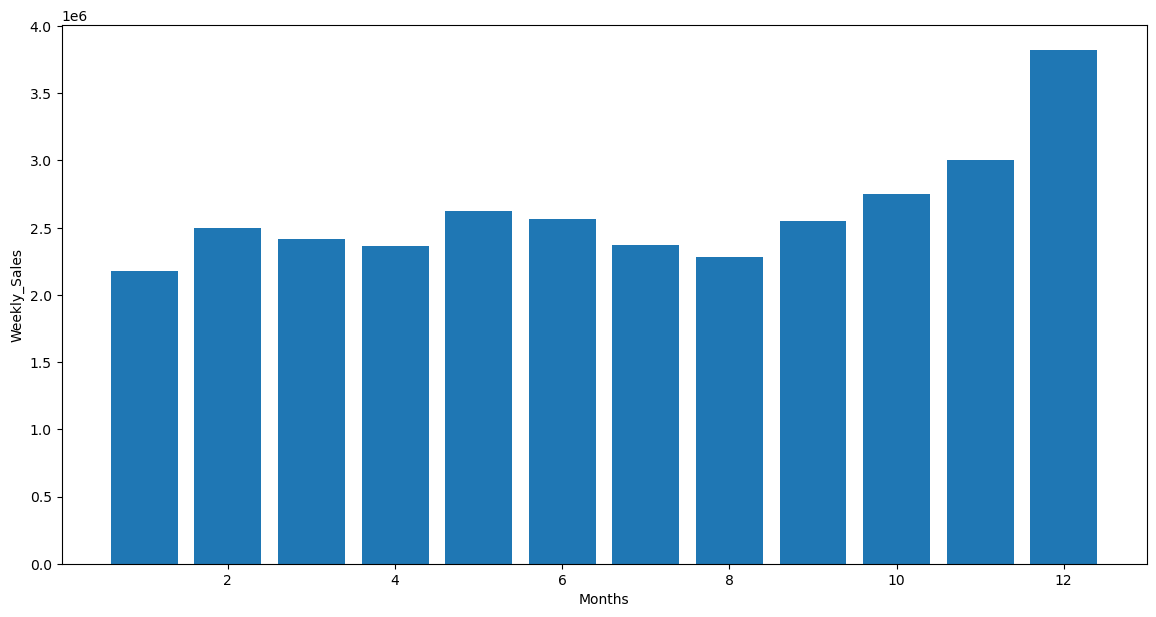

In [90]:
plt.figure(figsize=(14,7))
plt.bar(df['Month'], df['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')
plt.show()

December month has the highest weekly sales in all years 

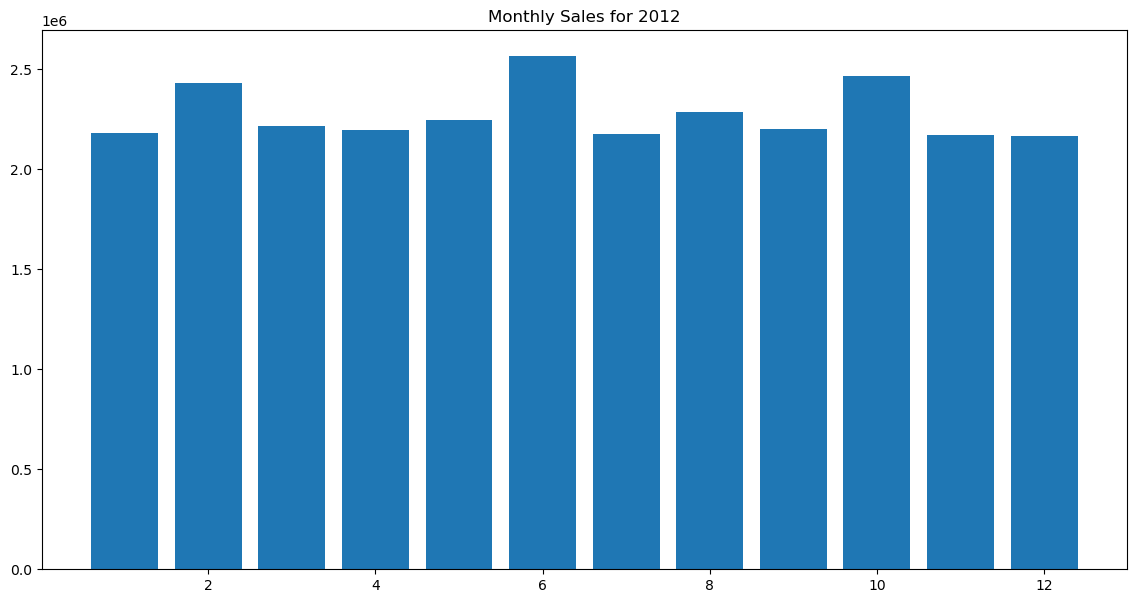

In [91]:
# Sales for 2012
plt.figure(figsize=(14,7))
plt.bar(df[df.Year==2012]['Month'], df[df.Year==2012]['Weekly_Sales'])
plt.title('Monthly Sales for 2012')
plt.show()

June is the hightest in year 2012

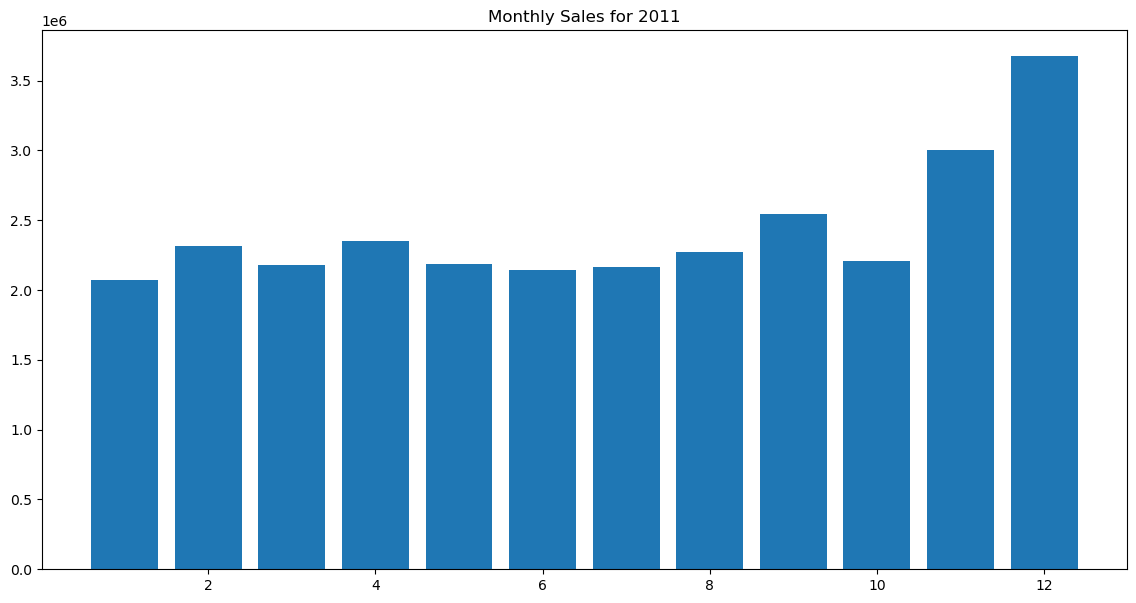

In [92]:
# Sales for 2011
plt.figure(figsize=(14,7))
plt.bar(df[df.Year==2011]['Month'], df[df.Year==2011]['Weekly_Sales'])
plt.title('Monthly Sales for 2011')
plt.show()

DECEMBER is the hightest in year 2011

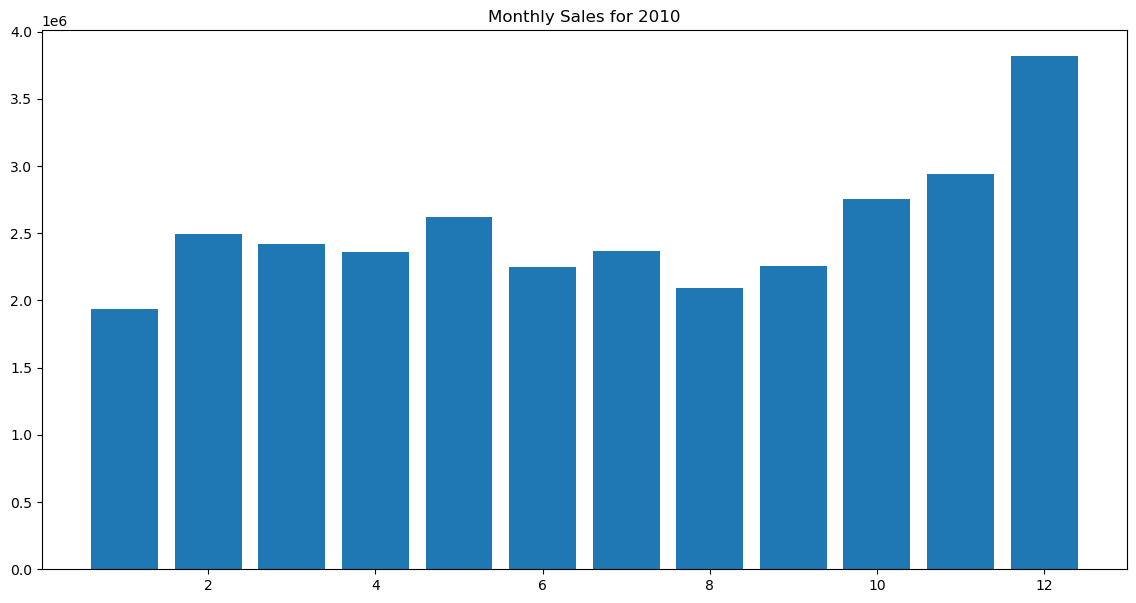

In [93]:
# Sales for 2010
plt.figure(figsize=(14,7))
plt.bar(df[df.Year==2010]['Month'], df[df.Year==2010]['Weekly_Sales'])
plt.title('Monthly Sales for 2010')
plt.show()

DECEMBER is the hightest in year 2010

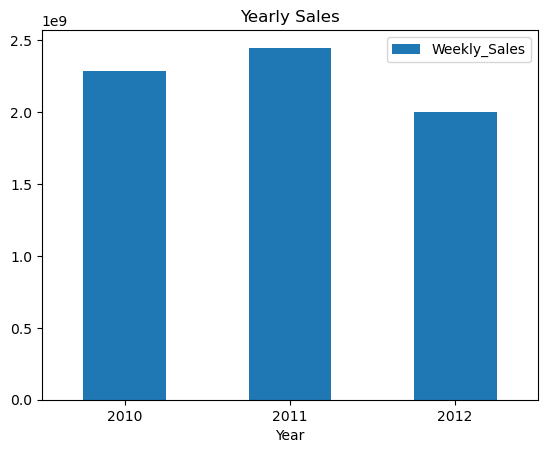

In [94]:
df.groupby('Year')[['Weekly_Sales']].sum().plot(kind='bar')
plt.title('Yearly Sales')
plt.xticks(rotation=360 )
plt.show()

2012 has the lowest weekly sales & Year 2011 has the highest weekly sales

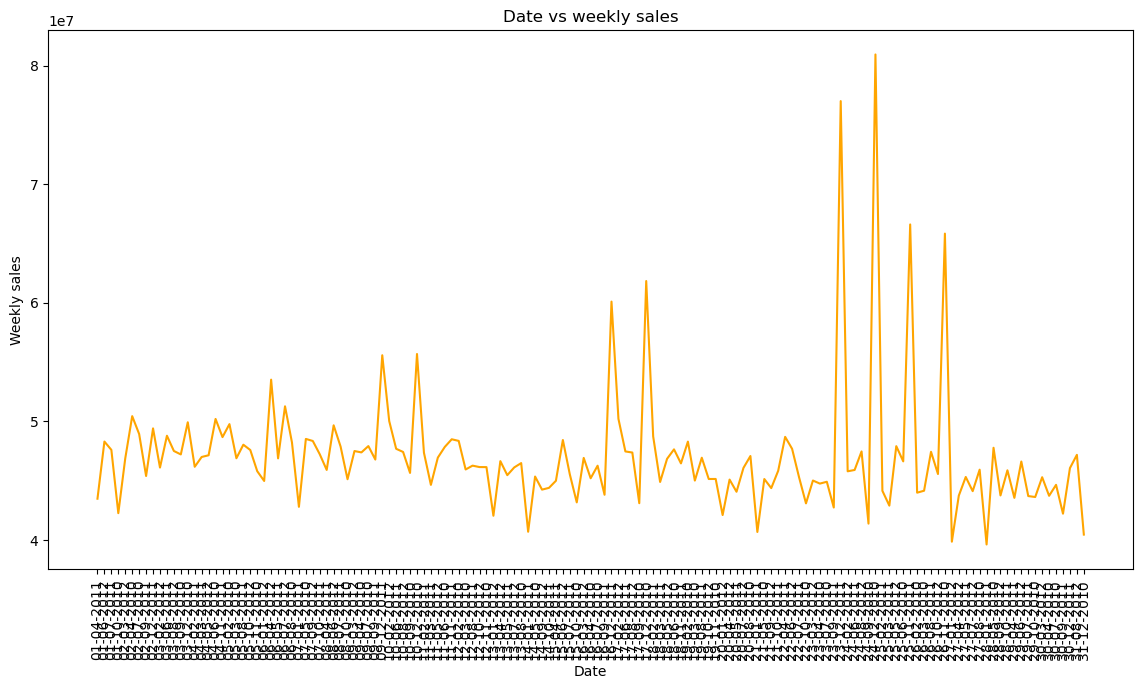

In [95]:
plt.figure(figsize=(14,7))
plt.title("Date vs weekly sales")
plt.xlabel("Date")
plt.ylabel("Weekly sales")
plt.xticks(rotation=90 )
plt.plot(df.groupby('Date')['Weekly_Sales'].sum(), color = "orange")
plt.show()

sales peaked from DEC2011(in the holidays season) to FEB2012

In [96]:
df.loc[df["Month"].isin([1,2,3,4]), "Semester"] = "Spring"
df.loc[df["Month"].isin([5,6,7,8]), "Semester"] = "Summer"
df.loc[df["Month"].isin([9,10,11,12]), "Semester"] = "Fall"
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday,Day,Month,Year,Semester
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Non-Holiday,2,5,2010,Summer
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl,2,12,2010,Fall
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Non-Holiday,19,2,2010,Spring
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Non-Holiday,26,2,2010,Spring
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Non-Holiday,3,5,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Non-Holiday,28,9,2012,Fall
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Non-Holiday,10,5,2012,Summer
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Non-Holiday,10,12,2012,Fall
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Non-Holiday,19,10,2012,Fall


In [97]:
df.groupby(["Year","Semester"])["Weekly_Sales"].sum()

Year  Semester
2010  Fall        8.931689e+08
      Spring      6.038648e+08
      Summer      7.918524e+08
2011  Fall        8.975979e+08
      Spring      8.150647e+08
      Summer      7.355374e+08
2012  Fall        4.609297e+08
      Spring      7.283328e+08
      Summer      8.108704e+08
Name: Weekly_Sales, dtype: float64

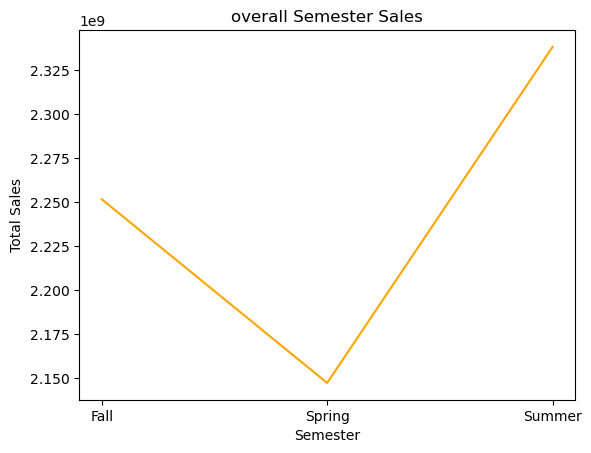

In [98]:
plt.plot(df.groupby('Semester')['Weekly_Sales'].sum(), color = "orange")
plt.xlabel('Semester')
plt.ylabel('Total Sales')
plt.title('overall Semester Sales')
plt.show()

summer has the highest sales

In [99]:
df["Year"]

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Year, Length: 6435, dtype: int32

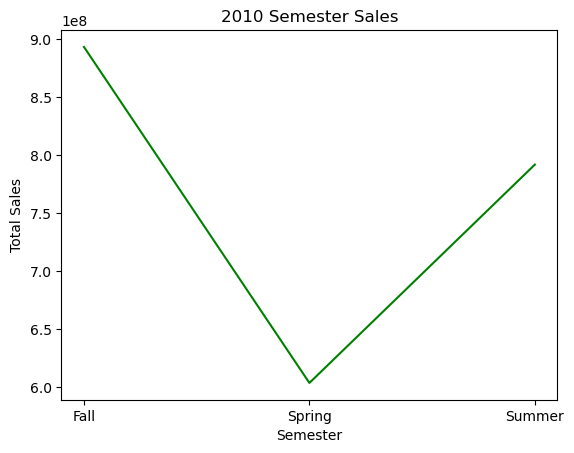

In [100]:
y10 = df[df["Year"] == 2010]
plt.plot(y10.groupby(["Semester"])["Weekly_Sales"].sum(), color="green")
plt.xlabel('Semester')
plt.ylabel('Total Sales')
plt.title('2010 Semester Sales')
plt.show()

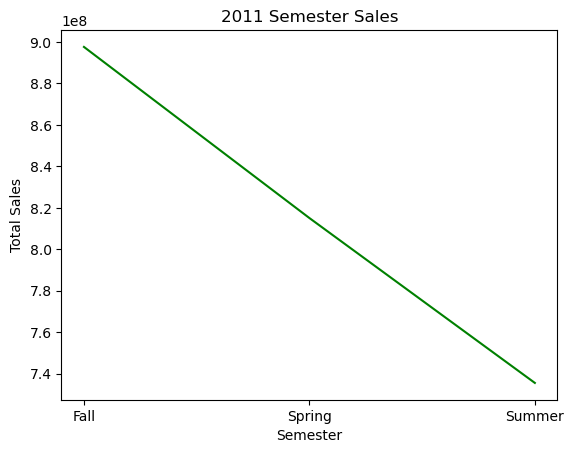

In [101]:
y11 = df[df["Year"] == 2011]
plt.plot(y11.groupby(["Semester"])["Weekly_Sales"].sum(), color="green")
plt.xlabel('Semester')
plt.ylabel('Total Sales')
plt.title('2011 Semester Sales')
plt.show()

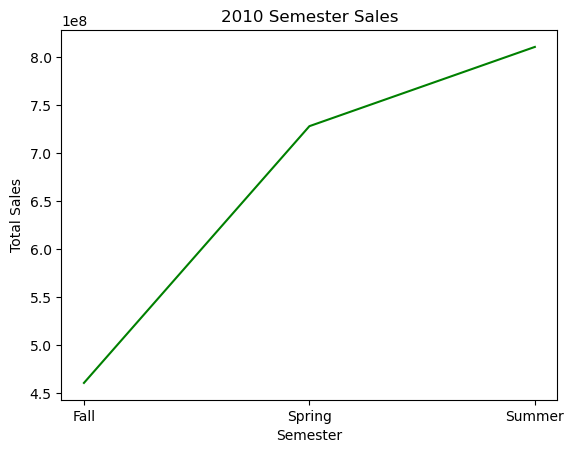

In [102]:
y12 = df[df["Year"] == 2012]
plt.plot(y12.groupby(["Semester"])["Weekly_Sales"].sum(), color="green")
plt.xlabel('Semester')
plt.ylabel('Total Sales')
plt.title('2010 Semester Sales')
plt.show()

In [103]:
#Financial Semester
df.loc[df["Month"].isin([1,2,3,4,5,6]), "Financial"] = "First"
df.loc[df["Month"].isin([7,8,9,10,11,12]), "Financial"] = "Second"
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday,Day,Month,Year,Semester,Financial
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Non-Holiday,2,5,2010,Summer,First
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl,2,12,2010,Fall,Second
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Non-Holiday,19,2,2010,Spring,First
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Non-Holiday,26,2,2010,Spring,First
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Non-Holiday,3,5,2010,Summer,First
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Non-Holiday,28,9,2012,Fall,Second
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Non-Holiday,10,5,2012,Summer,First
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Non-Holiday,10,12,2012,Fall,Second
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Non-Holiday,19,10,2012,Fall,Second


In [104]:
df.groupby(["Year","Financial"])["Weekly_Sales"].sum()

Year  Financial
2010  First        1.026913e+09
      Second       1.261973e+09
2011  First        1.138060e+09
      Second       1.310140e+09
2012  First        1.163004e+09
      Second       8.371288e+08
Name: Weekly_Sales, dtype: float64

second semester of 2012 is the best overall for sales

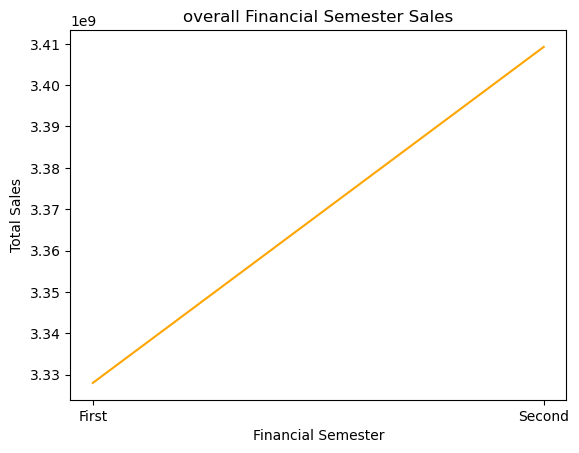

In [105]:
plt.plot(df.groupby('Financial')['Weekly_Sales'].sum(), color = "orange")
plt.xlabel('Financial Semester')
plt.ylabel('Total Sales')
plt.title('overall Financial Semester Sales')
plt.show()

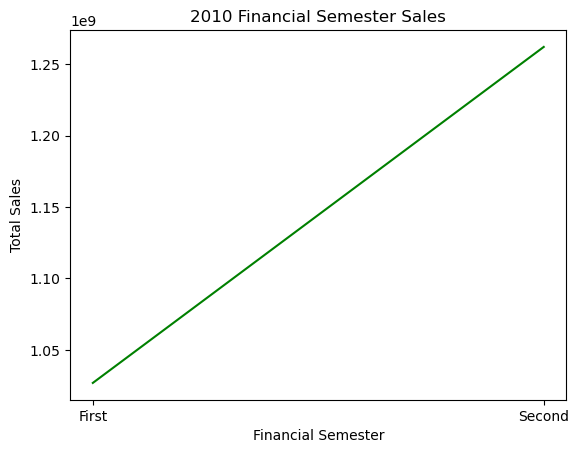

In [107]:
y10 = df[df["Year"] == 2010]
plt.plot(y10.groupby(["Financial"])["Weekly_Sales"].sum(), color="green")
plt.xlabel('Financial Semester')
plt.ylabel('Total Sales')
plt.title('2010 Financial Semester Sales')
plt.show()

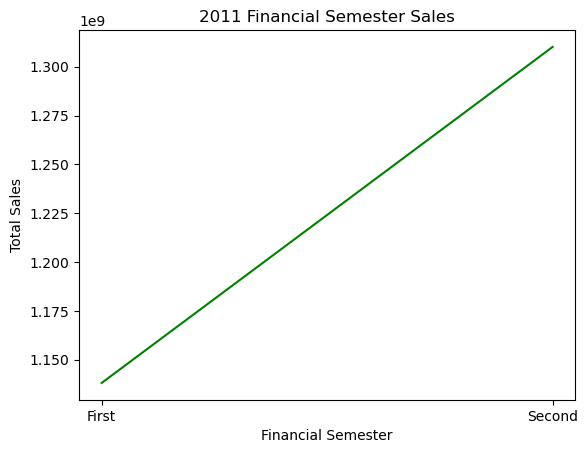

In [108]:
y11 = df[df["Year"] == 2011]
plt.plot(y11.groupby(["Financial"])["Weekly_Sales"].sum(), color="green")
plt.xlabel('Financial Semester')
plt.ylabel('Total Sales')
plt.title('2011 Financial Semester Sales')
plt.show()

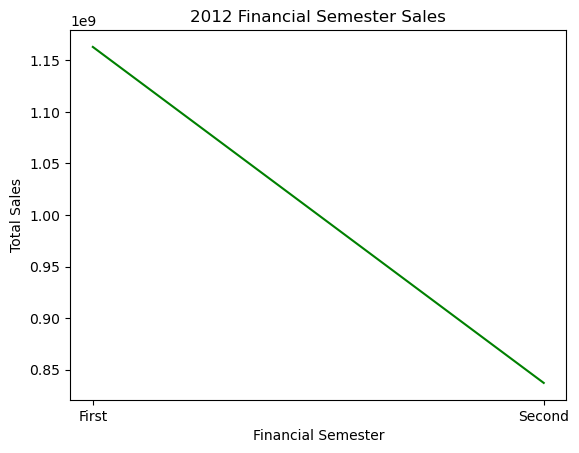

In [109]:
y12 = df[df["Year"] == 2012]
plt.plot(y12.groupby(["Financial"])["Weekly_Sales"].sum(), color="green")
plt.xlabel('Financial Semester')
plt.ylabel('Total Sales')
plt.title('2012 Financial Semester Sales')
plt.show()

># e)Plot the relations between weekly sales vs. other numeric features and give insights.

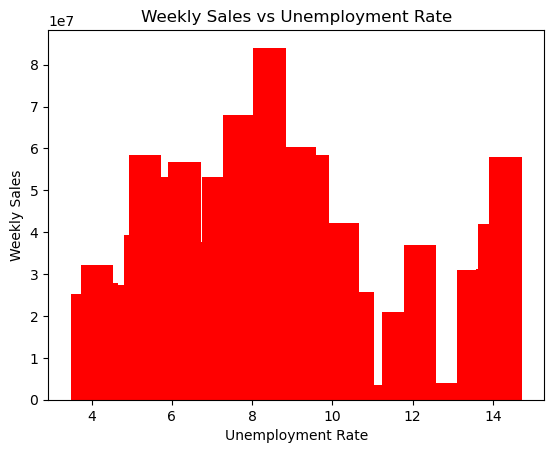

In [110]:
plt.title('Weekly Sales vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.bar(df['Unemployment'].unique(), df.groupby('Unemployment')['Weekly_Sales'].sum(), color = "r")
plt.show()

weekly sales decreased when Unemployment rate was between 10 and 14 and increased when it was at 8 to 9

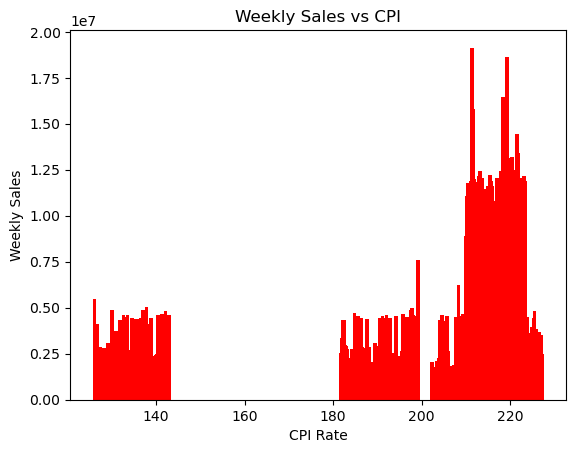

In [111]:
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI Rate')
plt.ylabel('Weekly Sales')
plt.bar(df['CPI'].unique(), df.groupby('CPI')['Weekly_Sales'].sum(), color = "r")
plt.show()

weekly sales increased when CPI was between 180 and 220 and decereased when it was between 140 and 180

In [112]:
# map temperature to ranges
def map_temperature_to_range(temperature):
    for range_min, range_max in temperature_ranges:
        if range_min <= temperature < range_max:
            return f"{range_min}-{range_max}"

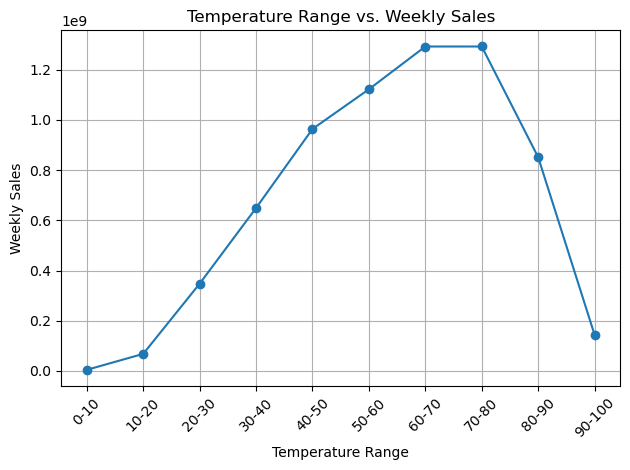

In [113]:
#temperature ranges
temperature_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50),(50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]

df['Temperature_Range'] = df['Temperature'].apply(map_temperature_to_range)
temperature_sales_mean = df.groupby('Temperature_Range')['Weekly_Sales'].sum()
plt.plot(temperature_sales_mean.index, temperature_sales_mean.values, marker='o')
plt.title('Temperature Range vs. Weekly Sales')
plt.xlabel('Temperature Range')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

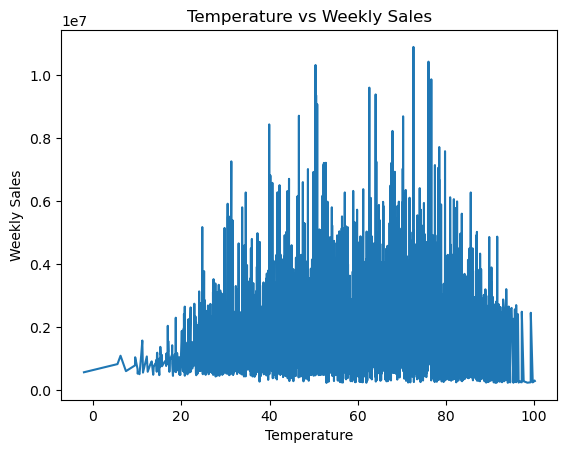

In [114]:
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.plot(df.groupby('Temperature')['Weekly_Sales'].sum())
plt.show()

best sales were at 50F and 80F

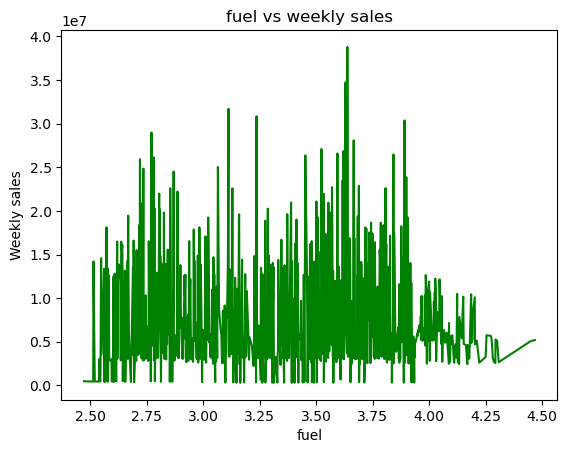

In [115]:
plt.title("fuel vs weekly sales")
plt.xlabel("fuel")
plt.ylabel("Weekly sales")
plt.plot( df.groupby('Fuel_Price')['Weekly_Sales'].sum(), color = "green")
plt.show()

sales get lower when fuel prices get over 4 and are the best when the prices are areound 3.60

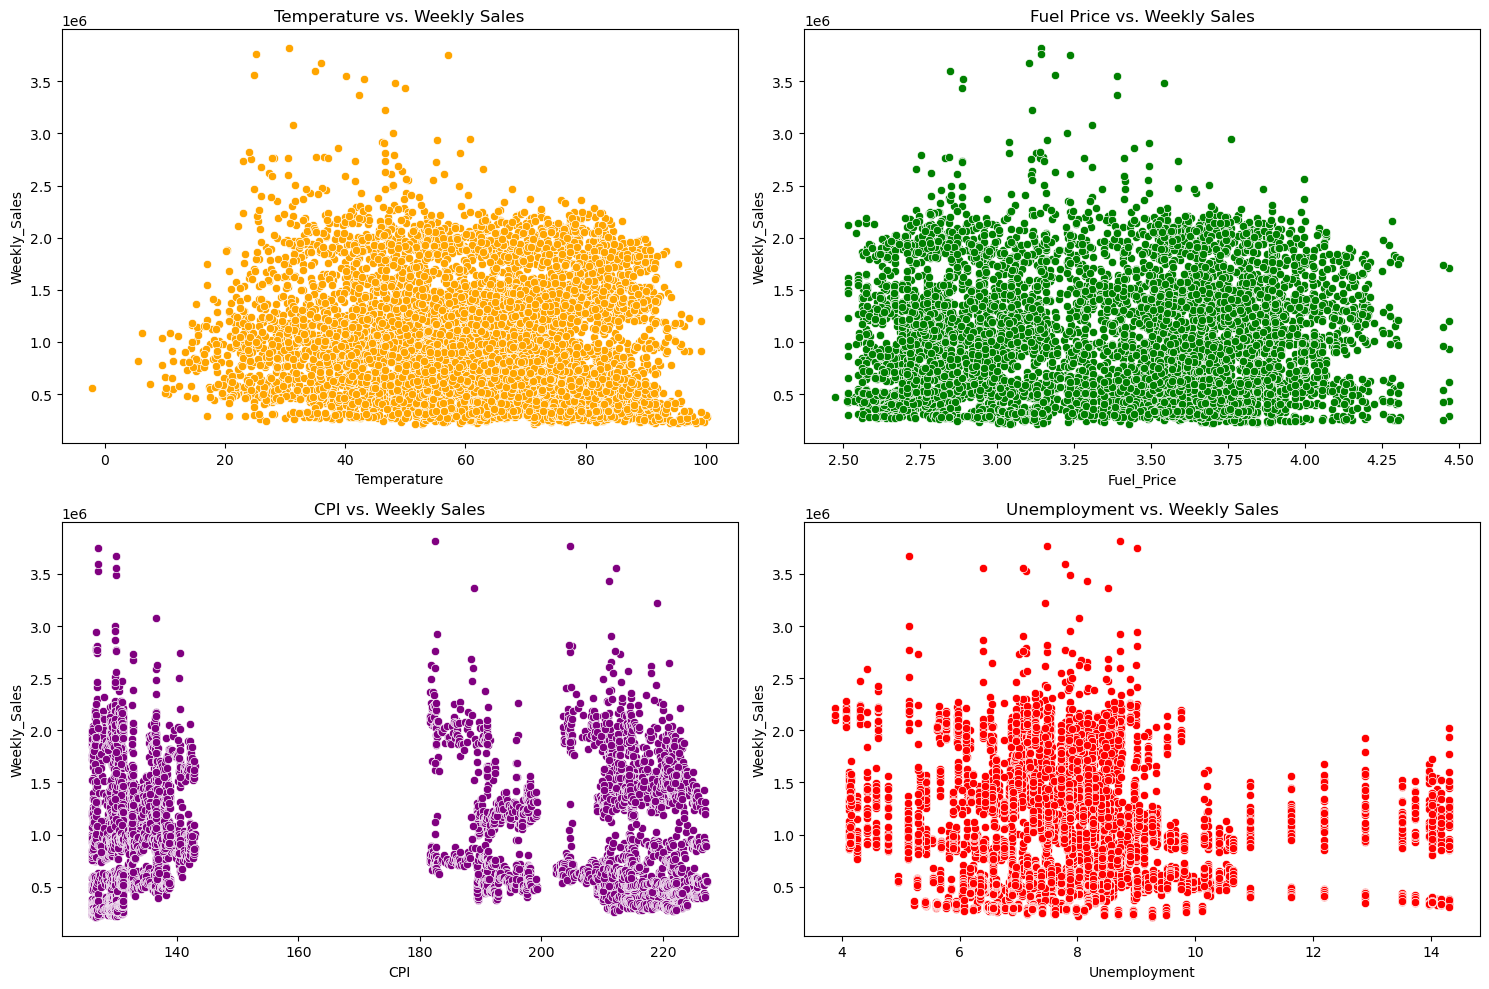

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, ax=axes[0, 0] , color ='orange')
axes[0, 0].set_title('Temperature vs. Weekly Sales')
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, ax=axes[0, 1], color ='green')
axes[0, 1].set_title('Fuel Price vs. Weekly Sales')
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, ax=axes[1, 0], color ='purple')
axes[1, 0].set_title('CPI vs. Weekly Sales')
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, ax=axes[1, 1], color ='r')
axes[1, 1].set_title('Unemployment vs. Weekly Sales')
plt.tight_layout()
plt.show()

>Temperature vs. Weekly Sales: The scatter plot shows a relationship between temperature and weekly sales. There is a slight positive correlation, indicating that sales increase with higher temperatures.

>Fuel Price vs. Weekly Sales: There seem to be a clear relation between fuel price and weekly sales based on the scatter plot. Sales decreased when fuel price reached 4.5 and incresaed when it reached 3~3.25

>CPI vs. Weekly Sales: The scatter plot shows a clear negative correlation relationship between CPI and weekly sales. It seems that between 140-180 in Cpi sales vanished.

>Unemployment vs. Weekly Sales: Similarly, there appear to be a strong relationship between unemployment rates and weekly sales.when the unemployment rate exceeds 10, sales tend to get lower. increase in unemployment rates 10-14 is directly correlated with the decrease in sales 

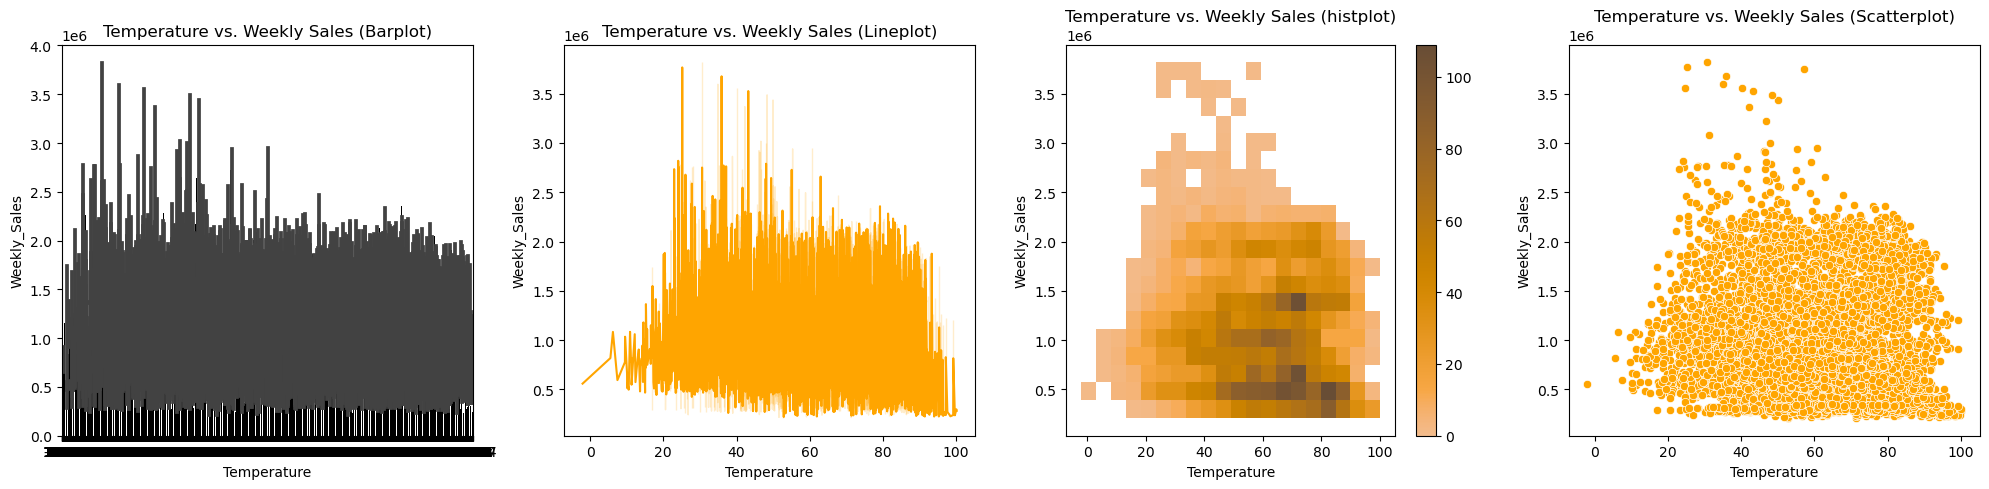

In [117]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.barplot(x='Temperature', y='Weekly_Sales', data=df, ax=axes[0], color ='black')
sns.lineplot(x='Temperature', y='Weekly_Sales', data=df, ax=axes[1], color ='orange')
sns.histplot(data=df, x='Temperature', y='Weekly_Sales', ax=axes[2], bins=20, cbar=True, color ='orange')
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, ax=axes[3], color ='orange')
axes[0].set_title('Temperature vs. Weekly Sales (Barplot)')
axes[1].set_title('Temperature vs. Weekly Sales (Lineplot)')
axes[2].set_title('Temperature vs. Weekly Sales (histplot)')
axes[3].set_title('Temperature vs. Weekly Sales (Scatterplot)')
plt.tight_layout()
plt.show()

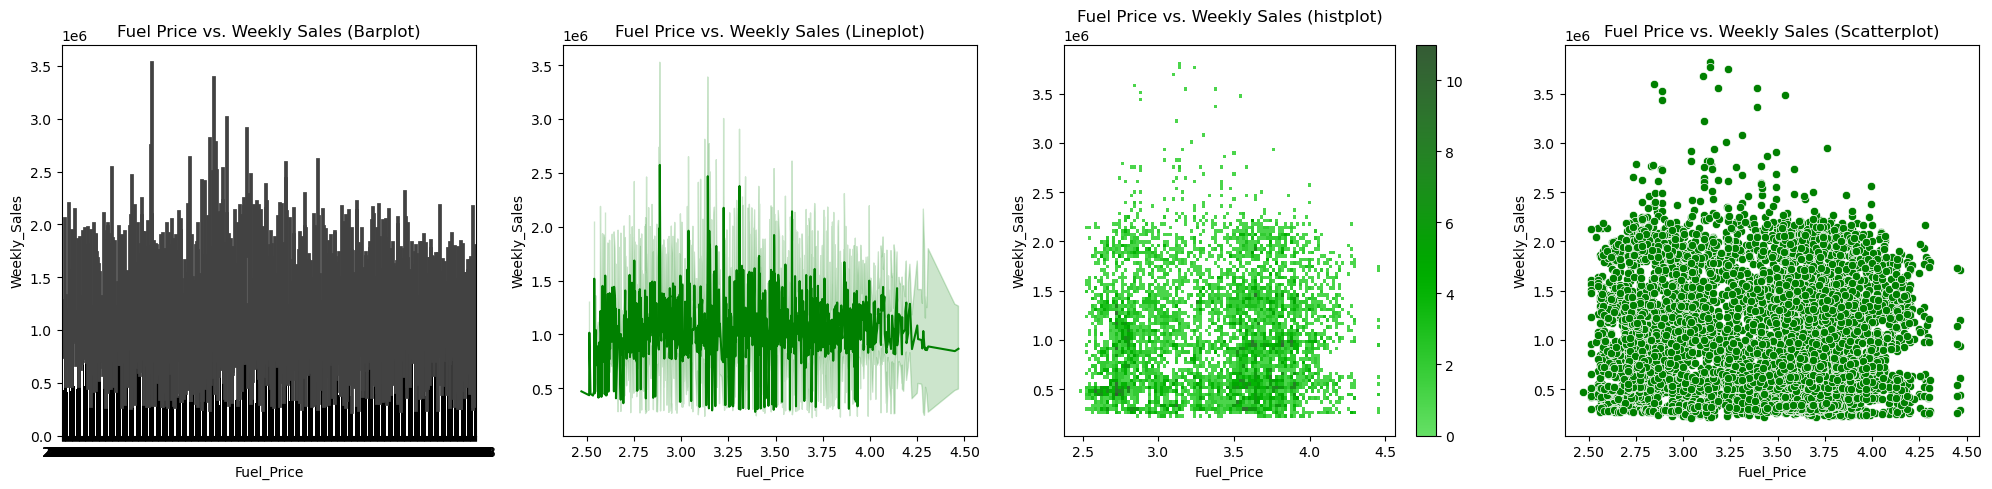

In [118]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.barplot(x='Fuel_Price', y='Weekly_Sales', data=df, ax=axes[0], color ='black')
sns.lineplot(x='Fuel_Price', y='Weekly_Sales', data=df, ax=axes[1], color ='green')
sns.histplot(data=df, x='Fuel_Price', y='Weekly_Sales', ax=axes[2], bins=100, cbar=True, color ='green')
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, ax=axes[3], color ='green')
axes[0].set_title('Fuel Price vs. Weekly Sales (Barplot)')
axes[1].set_title('Fuel Price vs. Weekly Sales (Lineplot)')
axes[2].set_title('Fuel Price vs. Weekly Sales (histplot)')
axes[3].set_title('Fuel Price vs. Weekly Sales (Scatterplot)')
plt.tight_layout()
plt.show()

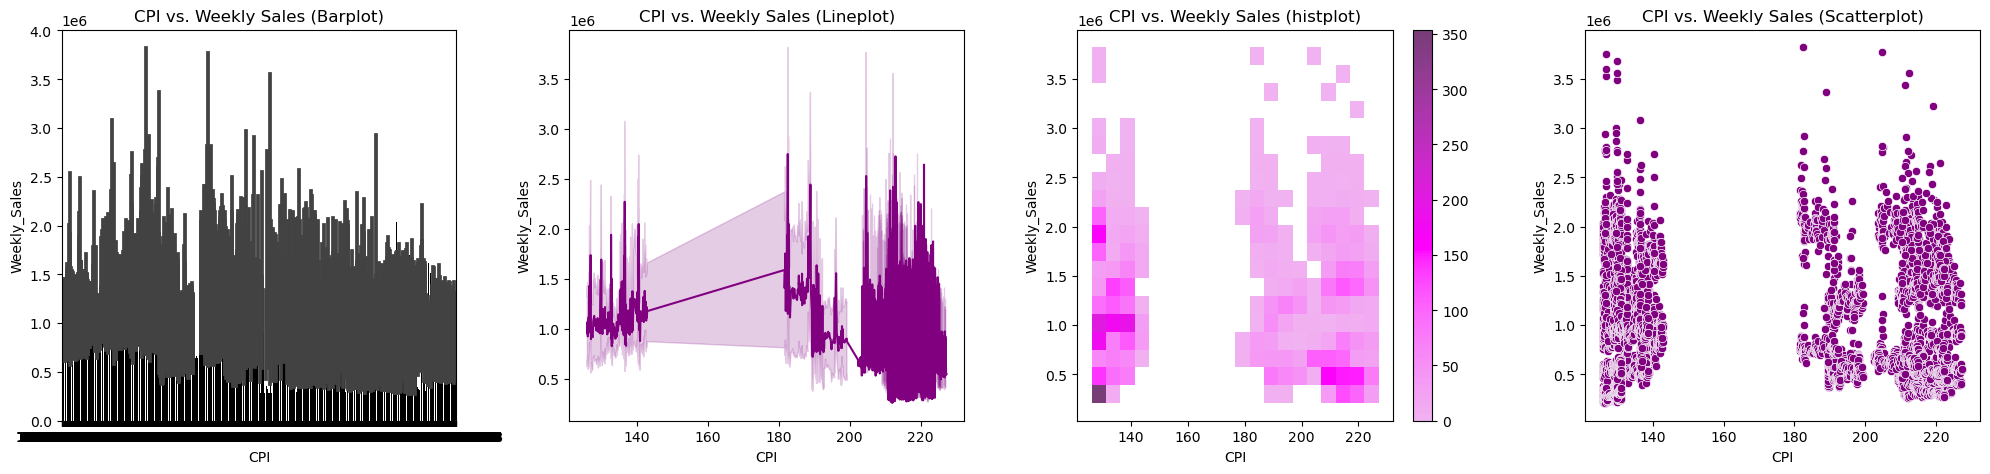

In [119]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.barplot(x='CPI', y='Weekly_Sales', data=df, ax=axes[0], color ='black')
sns.lineplot(x='CPI', y='Weekly_Sales', data=df, ax=axes[1], color ='purple')
sns.histplot(data=df, x='CPI', y='Weekly_Sales', ax=axes[2], bins=20, cbar=True, color ='purple')
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, ax=axes[3], color ='purple')
axes[0].set_title('CPI vs. Weekly Sales (Barplot)')
axes[1].set_title('CPI vs. Weekly Sales (Lineplot)')
axes[2].set_title('CPI vs. Weekly Sales (histplot)')
axes[3].set_title('CPI vs. Weekly Sales (Scatterplot)')
plt.tight_layout()
plt.show()

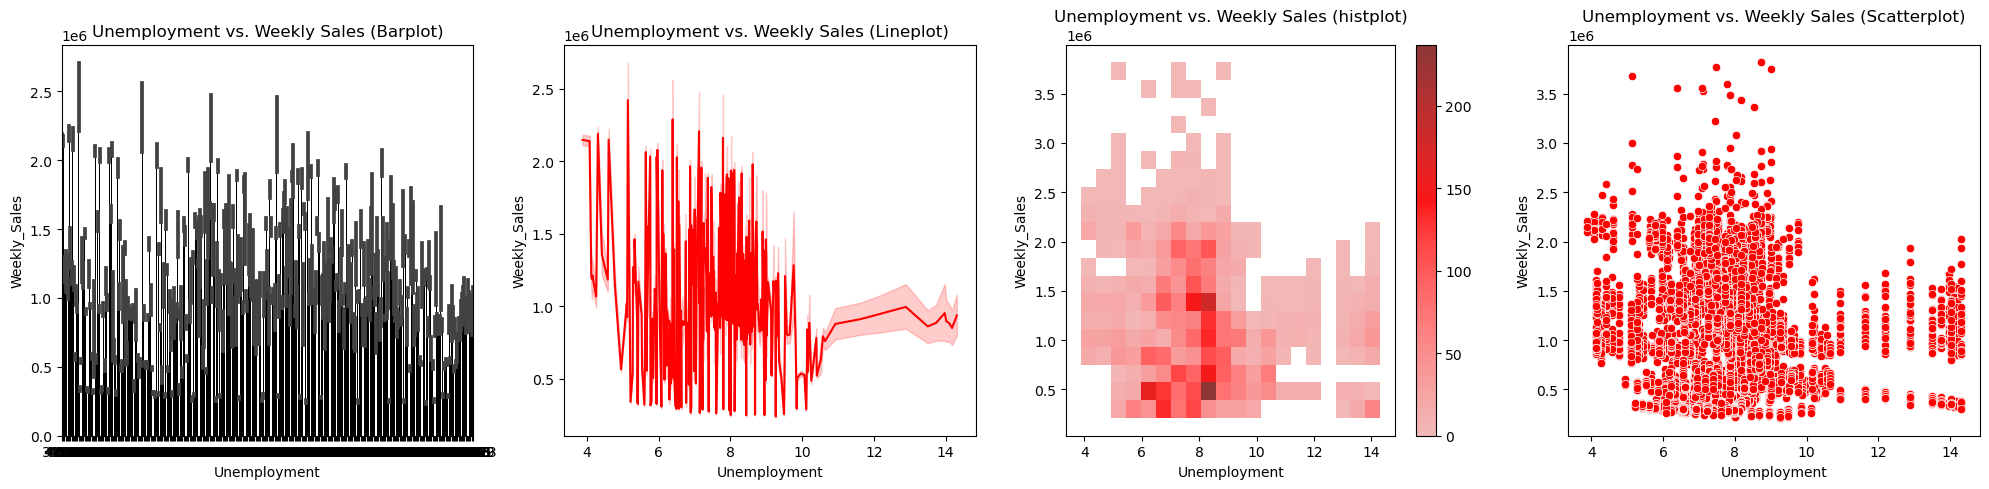

In [120]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.barplot(x='Unemployment', y='Weekly_Sales', data=df, ax=axes[0], color ='black')
sns.lineplot(x='Unemployment', y='Weekly_Sales', data=df, ax=axes[1], color ='r')
sns.histplot(data=df, x='Unemployment', y='Weekly_Sales', ax=axes[2], bins=20, cbar=True, color ='r')
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, ax=axes[3], color ='r')
axes[0].set_title('Unemployment vs. Weekly Sales (Barplot)')
axes[1].set_title('Unemployment vs. Weekly Sales (Lineplot)')
axes[2].set_title('Unemployment vs. Weekly Sales (histplot)')
axes[3].set_title('Unemployment vs. Weekly Sales (Scatterplot)')
plt.tight_layout()
plt.show()

(array([[  5.,  28.,   6.,   4.,   5.,   5.,   6.,   9.,   0.,   2.,   3.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 38.,  84.,  31.,  42.,  16.,  22.,  49.,  21.,  13.,  30.,   5.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 28., 122.,  58.,  49.,  55.,  66.,  46.,  16.,  11.,  32.,  15.,
           2.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
        [ 50.,  60.,  51.,  62.,  79.,  58.,  28.,  24.,  13.,  43.,  24.,
          12.,   5.,   2.,   2.,   0.,   0.,   0.,   1.,   0.],
        [ 33.,  24.,  44.,  37.,  40.,  20.,  36.,  19.,  19.,  28.,  16.,
           3.,   2.,   1.,   1.,   0.,   0.,   1.,   1.,   0.],
        [ 54.,  64.,  36.,  32.,  36.,  45.,  35.,  18.,  26.,  21.,  10.,
           3.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.],
        [ 58.,  39.,  22.,  19.,  33.,  30.,  20.,  19.,  18.,  19.,   7.,
           5.,   4.,   3.,   5.,   1.,   1.,   0.,   0.,   3.],
        [ 24.,  36.,  31., 

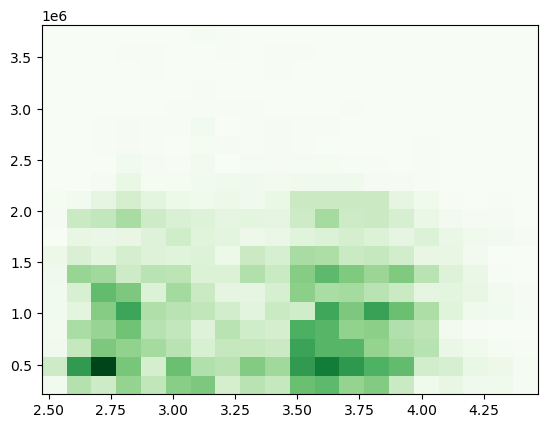

In [121]:
plt.hist2d(x=df['Fuel_Price'], y=df['Weekly_Sales'], bins=20, cmap='Greens')

# linear regression

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [128]:
df_raw = pd.read_csv("walmart-sales-dataset-of-45stores.csv")

In [129]:
df_raw['DateN'] = pd.to_datetime(df_raw['Date'],format="%d-%m-%Y")
df_raw = df_raw[df_raw['Holiday_Flag']!=1]
df_raw['Store'] = pd.Categorical(df_raw['Store'])

1.Convert 'Date' series into datetime.2.Remove weeks with a holiday since they are often outliers.3.Convert the 'Store' series into a categorical series.




In [130]:
df_raw['Sales_Median'] = df_raw.groupby('Store')['Weekly_Sales'].transform('median')
df_raw['Sales_Norm'] = df_raw['Weekly_Sales']-df_raw['Sales_Median']
df_raw['Fuel_Median'] = df_raw.groupby('Store')['Fuel_Price'].transform('median')
df_raw['Fuel_Norm'] = df_raw['Fuel_Price']-df_raw['Fuel_Median']

4.Create a new series that normalizes 'Fuel_Price' to a 'Stores' median 'Fuel_Price'5.
Create a new series that normalizes 'Weekly_Sales' to a 'Stores' median 'Weekly_Sale.

In [131]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5985 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5985 non-null   category      
 1   Date          5985 non-null   object        
 2   Weekly_Sales  5985 non-null   float64       
 3   Holiday_Flag  5985 non-null   int64         
 4   Temperature   5985 non-null   float64       
 5   Fuel_Price    5985 non-null   float64       
 6   CPI           5985 non-null   float64       
 7   Unemployment  5985 non-null   float64       
 8   DateN         5985 non-null   datetime64[ns]
 9   Sales_Median  5985 non-null   float64       
 10  Sales_Norm    5985 non-null   float64       
 11  Fuel_Median   5985 non-null   float64       
 12  Fuel_Norm     5985 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 615.1+ KB
None


In [134]:
df_train, df_test = train_test_split(df_raw,random_state=0, train_size=0.8)

Split the dataframe into two dataframes. One for training the model and one for testing

In [135]:
model = LinearRegression(fit_intercept=True)
model.fit(df_train[['Fuel_Norm']],df_train['Sales_Norm'])

LinearRegression()

Make a linear model from the training dataframe.

In [136]:
score = model.score(df_test[['Fuel_Norm']],df_test['Sales_Norm'])
print('The coefficient of determination for a linear model comparing changes in fuel prices to changes in store revenue is, ',round(score,5),".",sep="")

The coefficient of determination for a linear model comparing changes in fuel prices to changes in store revenue is, 0.00068.


In [137]:
x_input = pd.Series(np.arange(-0.8,0.9,step=0.2))
y_predict = model.predict(x_input.values.reshape(-1, 1))

Make a prediction series to visualize the model

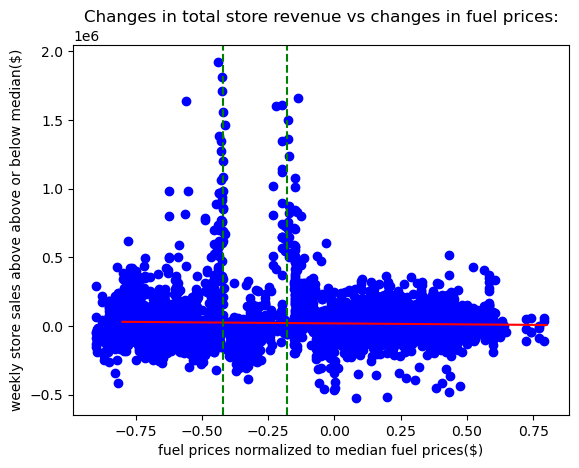

In [138]:
plt.scatter(df_raw['Fuel_Norm'],df_raw['Sales_Norm'],color='blue')
plt.plot(x_input,y_predict,color='red')
plt.xlabel('fuel prices normalized to median fuel prices($)')
plt.ylabel('weekly store sales above above or below median($)')
plt.title('Changes in total store revenue vs changes in fuel prices:')
plt.axvline(x=-.42, color='green', linestyle='--')
plt.axvline(x=-.18, color='green', linestyle='--')
plt.show()

Gas prices don't strongly correlate with changes in store revenue.
Outside of the model, the biggest increases in store revenue all happen when gas prices are below the median prices.